<a href="https://colab.research.google.com/github/jzambrano-xyz/cyberdigest.xyz/blob/main/Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [CyberDigest.xyz](https://open.substack.com/pub/jzambrano/p/comparative-analysis-tensorflow-vs?r=2rwt3l&utm_campaign=post&utm_medium=web) 🤖 🍩

# Q-learning 101

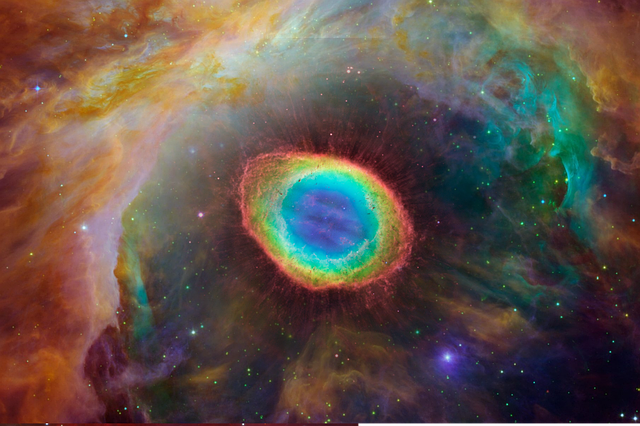


Image by [spirit111 via Pixabay](https://pixabay.com/illustrations/universe-galaxies-fog-space-cosmos-2258216/)


Let's create a simple example of Q-learning in Python. We'll use a very basic environment: a 1D world where the agent must move to the right end to win. This example is simplified to illustrate the concepts clearly.

The environment:

    A linear world with 5 states (positions) labeled 0 to 4.
    The agent starts at position 0.
    The goal is to reach position 4.
    Actions are moving left (0) or right (1).
    A reward of 100 is given for reaching the goal, and a small negative reward (-1) for each step, to encourage efficiency.

Explanation of the Code:

    Initialization: We initialize the environment parameters and the Q-table, which holds the Q-values for each state-action pair.

    Action Selection: The choose_action function selects an action for the current state. It uses ε-greedy policy: with probability ε, it explores by choosing a random action, and with probability 1-ε, it exploits the best known action.

    Learning: The update function updates the Q-values in the table using the Bellman equation. It takes the current state, next state, reward, and action to adjust the Q-value towards the expected long-term return.

    Training Loop: We run multiple episodes where the agent interacts with the environment. In each episode, it starts from the initial state and makes decisions based on its Q-table, updating the table with each step.

    Result: After training, the Q-table represents the learned policy, indicating the best action to take in each state.

When you run this code, you'll see the trained Q-table, where each row corresponds to a state and each column to an action. The values represent the expected long-term return for taking that action in that state, guiding the agent to the goal.

In [ ]:
import numpy as np
import random

# Environment settings
n_states = 5
actions = [0, 1]  # 0: move left, 1: move right
epsilon = 0.1  # Exploration factor
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
n_episodes = 1000

# Initialize Q-table
Q = np.zeros((n_states, len(actions)))

# Function to choose the next action
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)  # Explore
    else:
        return np.argmax(Q[state, :])  # Exploit best known action

# Function to learn the Q-value
def update(state, state2, reward, action):
    predict = Q[state, action]
    target = reward + gamma * np.max(Q[state2, :])
    Q[state, action] = Q[state, action] + alpha * (target - predict)

# Q-learning algorithm
for _ in range(n_episodes):
    state = 0
    while state < n_states - 1:
        action = choose_action(state)
        state2 = state + (1 if action == 1 else -1)
        state2 = max(0, min(state2, n_states - 1))  # Stay within bounds

        # Reward function
        reward = 100 if state2 == n_states - 1 else -1

        # Update Q-Table
        update(state, state2, reward, action)

        # Move to the next state
        state = state2

print("Trained Q-Table:")
print(Q)


Trained Q-Table:
[[ 10.70787775  19.64      ]
 [ 10.76919405  34.4       ]
 [ 19.56592218  59.        ]
 [ 34.16323447 100.        ]
 [  0.           0.        ]]


# Q-learning: Practical application in the stock market

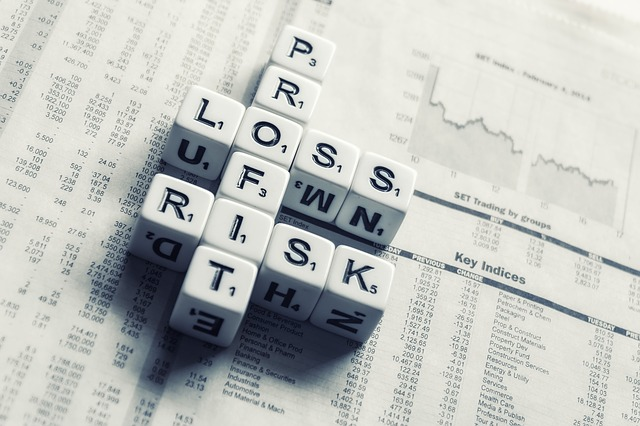

Image by [AbsolutVision via Pixabay](https://pixabay.com/illustrations/dices-over-newspaper-profit-2656028/)

Let's create a more elaborate Q-learning example using an economic scenario. Imagine we have a simplified stock market environment where an agent decides whether to buy, hold, or sell stocks based on their prices.
Scenario Description:

    States: The states are a combination of the agent's current portfolio status (e.g., amount of stock owned) and a simplified representation of the market condition (e.g., low, medium, or high prices).

    Actions: The agent can choose to buy, hold, or sell stocks.

    Rewards: The reward is based on the profit or loss made by the agent's actions. For example, selling at a higher price than the buying price yields a positive reward.

    Objective: The agent's goal is to maximize profit over a series of trading days.

    *The market conditions and stock prices will be simplified for the sake of the example.

Explanation:

    States and Actions: The states are defined by the combination of market conditions and portfolio status. Actions include buying, holding, or selling stocks.

    Rewards: The reward system is designed to reflect economic incentives - selling at higher market conditions yields more profit.

    Market Simulation: simulate_market function randomly determines the market condition to simulate market fluctuation.

    Portfolio Update: update_portfolio adjusts the agent's portfolio based on the action taken.

    Q-learning: The agent learns the optimal policy over multiple episodes, with the objective to maximize profits by making smart buy/sell decisions.

    End Condition: An episode ends when the agent's portfolio is either full or empty, simulating a trading period.

This code is a basic simulation and can be expanded with more complex market dynamics and portfolio strategies for a more realistic economic model.

In [ ]:
import numpy as np
import random

# Environment settings
n_market_conditions = 3  # 0: low, 1: medium, 2: high
n_portfolio_status = 3  # 0: no stocks, 1: few stocks, 2: many stocks
actions = [0, 1, 2]  # 0: buy, 1: hold, 2: sell
epsilon = 0.1
alpha = 0.1
gamma = 0.6
n_episodes = 1000

# Initialize Q-table
n_states = n_market_conditions * n_portfolio_status
Q = np.zeros((n_states, len(actions)))

# Helper function to get the state index
def get_state_index(market_condition, portfolio_status):
    return market_condition * n_portfolio_status + portfolio_status

# Function to choose the next action
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(actions)
    else:
        return np.argmax(Q[state, :])

# Function to simulate the market (simplified)
def simulate_market():
    return random.randint(0, n_market_conditions - 1)  # Random market condition

# Function to update portfolio status based on action
def update_portfolio(portfolio, action, market_condition):
    if action == 0:  # Buy
        return min(n_portfolio_status - 1, portfolio + 1)
    elif action == 2 and portfolio > 0:  # Sell
        return max(0, portfolio - 1)
    return portfolio  # Hold or no change

# Function to calculate reward
def calculate_reward(portfolio, action, market_condition):
    if action == 2:  # Selling
        return market_condition * 10 * portfolio  # Higher reward for selling at high prices
    return -1 * portfolio  # Small negative reward for holding or buying

# Q-learning algorithm
for _ in range(n_episodes):
    market_condition = simulate_market()
    portfolio_status = 1  # Starting with a few stocks

    state = get_state_index(market_condition, portfolio_status)
    while True:
        action = choose_action(state)
        new_market_condition = simulate_market()
        new_portfolio_status = update_portfolio(portfolio_status, action, market_condition)
        reward = calculate_reward(portfolio_status, action, market_condition)

        new_state = get_state_index(new_market_condition, new_portfolio_status)
        predict = Q[state, action]
        target = reward + gamma * np.max(Q[new_state, :])
        Q[state, action] += alpha * (target - predict)

        state, portfolio_status, market_condition = new_state, new_portfolio_status, new_market_condition

        if new_portfolio_status == 0 or new_portfolio_status == n_portfolio_status - 1:
            break  # End episode when portfolio is empty or full

print("Trained Q-Table:")
print(Q)


Trained Q-Table:
[[ 0.          0.          0.        ]
 [-0.90152291  6.14946011  0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [-0.86491483  4.50513518 10.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [-0.77123208  4.7731272  20.        ]
 [ 0.          0.          0.        ]]


**Remember**: The Q-table in the output of the Q-learning algorithm represents the learned values (Q-values) for each combination of state and action.

In the context of this stock market example, each state is a combination of the market condition and the portfolio status, and each action is one of the possible decisions (buy, hold, or sell stocks).

Here's a breakdown of what the Q-table represents:

1. **Rows**: Each row in the Q-table corresponds to a specific state in the environment. On this example, states are derived from a combination of market conditions (low, medium, high) and portfolio status (no stocks, few stocks, many stocks). This means each row represents a unique scenario in the market with a particular portfolio status.

2. **Columns**: Each column corresponds to a possible action that the agent can take in that state. On this example, the actions are buy, hold, and sell.

3. **Values (Q-values)**: The values in the table (the Q-values) represent the expected cumulative future reward the agent expects to receive if it takes a certain action in a certain state and then follows the optimal policy thereafter. These values are learned and updated over time through the training process.

4. **Interpreting Q-Values**:
   - A higher Q-value for a specific state-action pair suggests that taking that action in that state is more favorable for the long-term reward.
   - For instance, if the Q-value for the state "medium market condition, few stocks" and the action "sell" is high, it implies that in that market condition, selling stocks is expected to yield a higher return in the long run.

5. **Decision Making**: When the agent encounters a state, it looks at the row in the Q-table corresponding to that state and chooses the action with the highest Q-value (exploitation). This is how the learned policy is applied.

In summary, the Q-table is essentially a guide for the agent, telling it what action is likely to be the best in each state based on its past experiences and learning. As the agent continues to learn, these values get refined and ideally converge to the optimal policy for the given environment and reward structure.

As a visual aid, here is the initialized Q-table for our stock market example, represented in a tabular format:

| States                     | Buy | Hold | Sell |
|----------------------------|-----|------|------|
| Low Market, No Stocks      | 0.0 | 0.0  | 0.0  |
| Low Market, Few Stocks     | 0.0 | 0.0  | 0.0  |
| Low Market, Many Stocks    | 0.0 | 0.0  | 0.0  |
| Medium Market, No Stocks   | 0.0 | 0.0  | 0.0  |
| Medium Market, Few Stocks  | 0.0 | 0.0  | 0.0  |
| Medium Market, Many Stocks | 0.0 | 0.0  | 0.0  |
| High Market, No Stocks     | 0.0 | 0.0  | 0.0  |
| High Market, Few Stocks    | 0.0 | 0.0  | 0.0  |
| High Market, Many Stocks   | 0.0 | 0.0  | 0.0  |

The table starts with all Q-values initialized to zero. Through the learning process, these values will be updated to reflect the expected cumulative reward of each action in each state. The action that the agent would choose in a given state is the one with the highest Q-value in that state's row.